In [1]:
import pandas as pd

wine_df = pd.read_csv("data/wine/wine.data", header=None)
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.model_selection import train_test_split

X, y = wine_df.iloc[:, 1:].values, wine_df.iloc[:, 0].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [3]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')

lr.fit(X_train_std, y_train)
print('训练集准确率:', lr.score(X_train_std, y_train))
print('测试集准确率:', lr.score(X_test_std, y_test))

训练集准确率: 1.0
测试集准确率: 1.0


In [5]:
lr.coef_

array([[ 1.24589009,  0.18130303,  0.74239482, -1.16047061,  0.        ,
         0.        ,  1.17651581,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54167029,  2.51181784],
       [-1.5367598 , -0.38743616, -0.99508215,  0.36489082, -0.05968021,
         0.        ,  0.66836417,  0.        ,  0.        , -1.93442656,
         1.23361461,  0.        , -2.23156006],
       [ 0.13541412,  0.16862278,  0.35722072,  0.        ,  0.        ,
         0.        , -2.4378748 ,  0.        ,  0.        ,  1.56400588,
        -0.81902669, -0.49238914,  0.        ]])

In [6]:
lr.intercept_

array([-1.26310389, -1.21602006, -2.36979807])

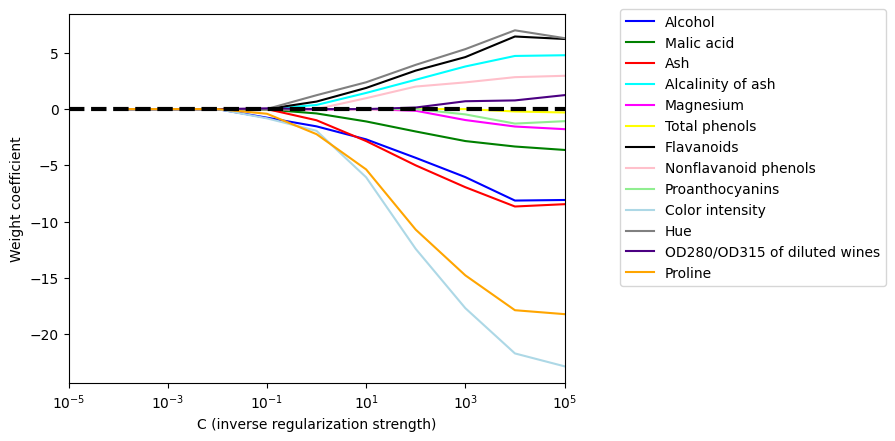

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=wine_df.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()